# Análisis exploratorio de datos de videojuegos

Samantha López Vizcarra

## Inicialización

In [1]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Cargar los datos
games = pd.read_csv("/datasets/games.csv")

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Limpieza de datos

### Títulos en minúscula

In [5]:
# Limpiar títulos
def clean_title (title):
    return title.lower().replace(" ", "_")

games = games.rename(columns = clean_title)

### Corregir tipos de variables

- year_of_release de float a int
- genre de object a category
- critic_score de float a int (verificar si no hay decimales)
- user_score de object a float
- rating de object a category

In [6]:
# Función para pasar de object a category
def obj_to_cat (column, db = games):
    db[column] = db[column].astype('category')

# genre
obj_to_cat('genre')

# rating
obj_to_cat('rating')

In [7]:
# year_of_release de float a int
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [8]:
# critic_score de float a int (verificar si no hay decimales)
np.array_equal(games['critic_score'].astype('Int64'), games['critic_score'])

False

In [9]:
# user_score de object a float 
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

games.head(10)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(2), float64(6), object(2)
memory usage: 1.2+ MB


### Valores ausentes

#### name

- pudieron ser valores que se olvidaron ingresar o borraron por error.
- solo son dos campos

In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Notamos que son datos muy viejos y no proporcionan informaión
- Borramos los datos

In [11]:
games = games.dropna(subset=['name'])

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(2), float64(6), object(2)
memory usage: 1.3+ MB


#### year of release

- pudieron ser valores que se olvidaron ingresar, borraron por error o no existe tal información
- dejamos los campos vacíos

#### critic score

- pudieron ser calificaciones que no se dieron, se olvidaron ingresar o borraron
- dejamos los campos vacíos, no podemos justificar rellenar con la media o mediana puesto que son juegos muy diferentes con características diferentes y de amplia variedad

#### user score

- pudieron ser calificaciones que no se dieron, se olvidaron ingresar o borraron
- dejamos los campos vacíos, no podemos justificar rellenar con la media o mediana puesto que son juegos muy diferentes con características diferentes y de amplia variedad

#### rating

- pudieron ser datos que se olvidaron ingresar o borraron 
- puede ser que los juegos no tengan una clasificación específica
- rellenamos con "No rating"

In [12]:
# agregar categoría
games['rating'] = games['rating'].cat.add_categories('No rating')

# completar valores ausentes
games['rating'] = games['rating'].fillna('No rating')

/tmp/ipykernel_66/2173886043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['rating'] = games['rating'].cat.add_categories('No rating')
/tmp/ipykernel_66/2173886043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['rating'] = games['rating'].fillna('No rating')


In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           16713 non-null  category
dtypes: Int64(1), category(2), float64(6), object(2)
memory usage: 1.3+ MB


### Ingeniería de características

#### Ventas totales

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

/tmp/ipykernel_66/1858785973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


## Análisis de datos

### Lanzamiento de juegos por años

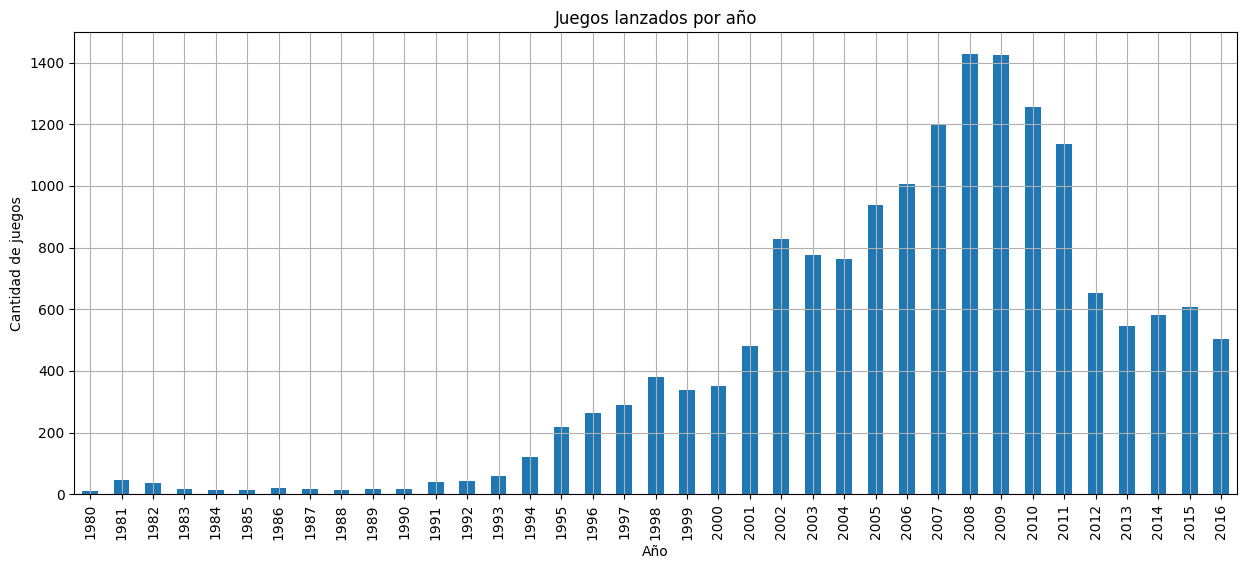

In [15]:
# Juegos por años
# Agrupar y graficar
games.groupby('year_of_release')['name'].count().plot(kind='bar',
                                                      title='Juegos lanzados por año',
                                                      xlabel='Año',
                                                      ylabel='Cantidad de juegos',
                                                      figsize=(15,6),
                                                      grid=True)
plt.show()

De los años 1980 a 1993 la cantidad de juegos lanzados es menor a 100, lo que podría no ser significativo. Aunque también es necesario tomar en cuenta que, debido a la naturaleza de los años es lógico que no hayan existido tantos lanzamientos o que no se tenga registro de ellos.

### Variación de ventas entre plataforma

#### Ventas en cada plataforma

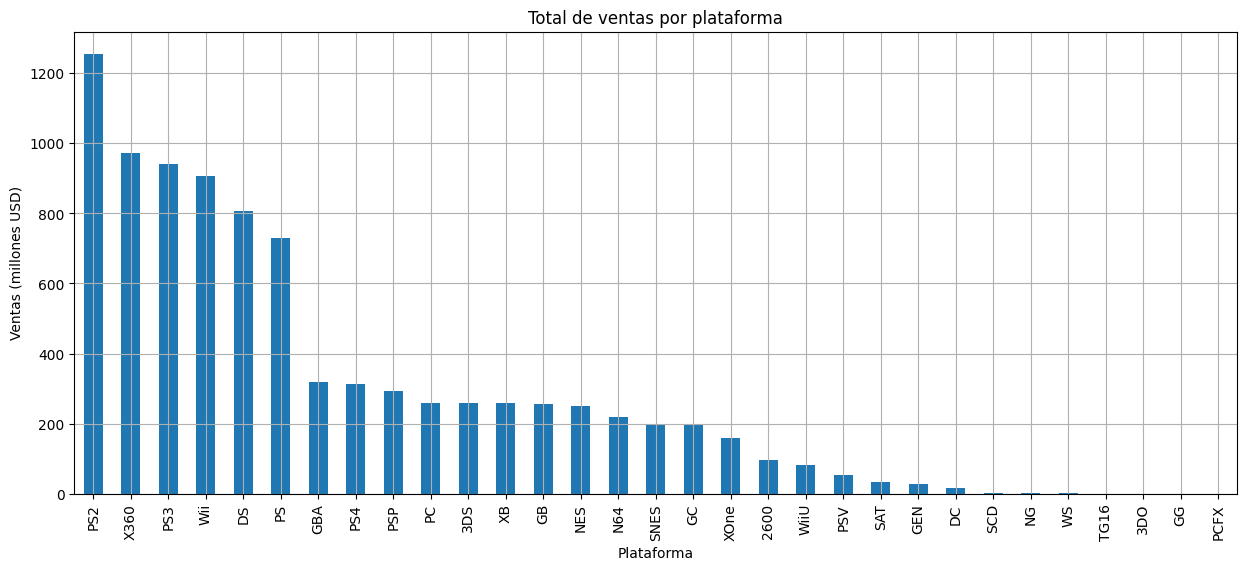

In [16]:
# Ventas por plataforma
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                 title='Total de ventas por plataforma',
                                                                                 xlabel='Plataforma',
                                                                                 ylabel='Ventas (millones USD)',
                                                                                 figsize=(15, 6),
                                                                                 grid=True)
plt.show()

#### Distribución por año de plataformas con más ventas

In [17]:
# Elegir las plataformas con más ventas
top_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

print(top_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


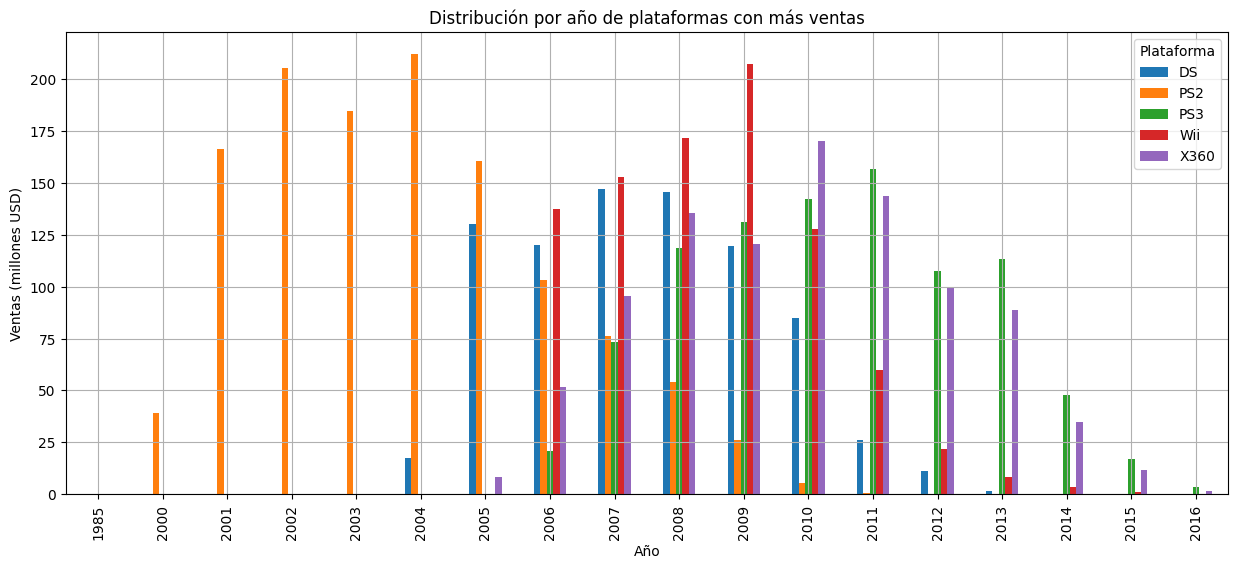

In [18]:
games_top_sales = games[games['platform'].isin(top_sales.index)]
pivot_top_sales = games_top_sales.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum')
# print(pivot_top_sales)

pivot_top_sales.plot(kind='bar',
                     figsize=(15,6),
                     title='Distribución por año de plataformas con más ventas',
                     xlabel='Año',
                     ylabel='Ventas (millones USD)',
                     grid=True)
plt.legend(title='Plataforma')
plt.show()

#### Plataformas que solían ser populares pero que ahora no tienen ventas

In [19]:
# Ventas totales por plataforma
total_sales_platform = games.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index()
# print(total_sales_plataform)

# Plataformas con pocas ventas 2016
platform_no_sales = total_sales_platform[(total_sales_platform['year_of_release'] == 2016) & (total_sales_platform['total_sales'] < 10)]
# print(platform_no_sales)

# Plataformas populares antes y ahora sin ventas
platforms_popular_no_sales = platform_no_sales.merge(top_sales, how='inner', on='platform')
platforms_popular_no_sales.rename(columns={'total_sales_x': '2016_sales', 'total_sales_y': 'total_sales'}, inplace=True)
print('Plataformas populares antes y ahora no tienen ventas')
print(platforms_popular_no_sales)

Plataformas populares antes y ahora no tienen ventas
  platform  year_of_release  2016_sales  total_sales
0      PS3             2016        3.60       939.65
1      Wii             2016        0.18       907.51
2     X360             2016        1.52       971.42


#### Años activos por plataforma

In [20]:
# Último año con ventas significativas
last_year_sales = total_sales_platform[total_sales_platform['total_sales'] > 10].groupby('platform')['year_of_release'].max().reset_index()
last_year_sales.rename(columns={'year_of_release' : 'last_year_sales'}, inplace=True)

# Primer año con ventas
first_year_sales = total_sales_platform[total_sales_platform['total_sales'] > 0].groupby('platform')['year_of_release'].min().reset_index()
first_year_sales.rename(columns={'year_of_release' : 'first_year_sales'}, inplace=True)

# Unir años de inicio y fin
year_sales = last_year_sales.merge(first_year_sales, how='inner', on='platform')

# Agregar columna de años activos
year_sales['active_years'] = year_sales['last_year_sales'] - year_sales['first_year_sales']

print('Años activos por plataforma')
print(year_sales)

Años activos por plataforma
   platform  last_year_sales  first_year_sales  active_years
0      2600             1982              1980             2
1       3DS             2016              2011             5
2        DS             2012              1985            27
3        GB             2000              1988            12
4       GBA             2005              2000             5
5        GC             2006              2001             5
6       GEN             1992              1990             2
7       N64             2000              1996             4
8       NES             1990              1983             7
9        PC             2014              1985            29
10       PS             2001              1994             7
11      PS2             2009              2000             9
12      PS3             2015              2006             9
13      PS4             2016              2013             3
14      PSP             2011              2004           

### Plataformas líderes en ventas

- Consideraremos como relevantes los últimos 5 años, de 2012 en adelante.

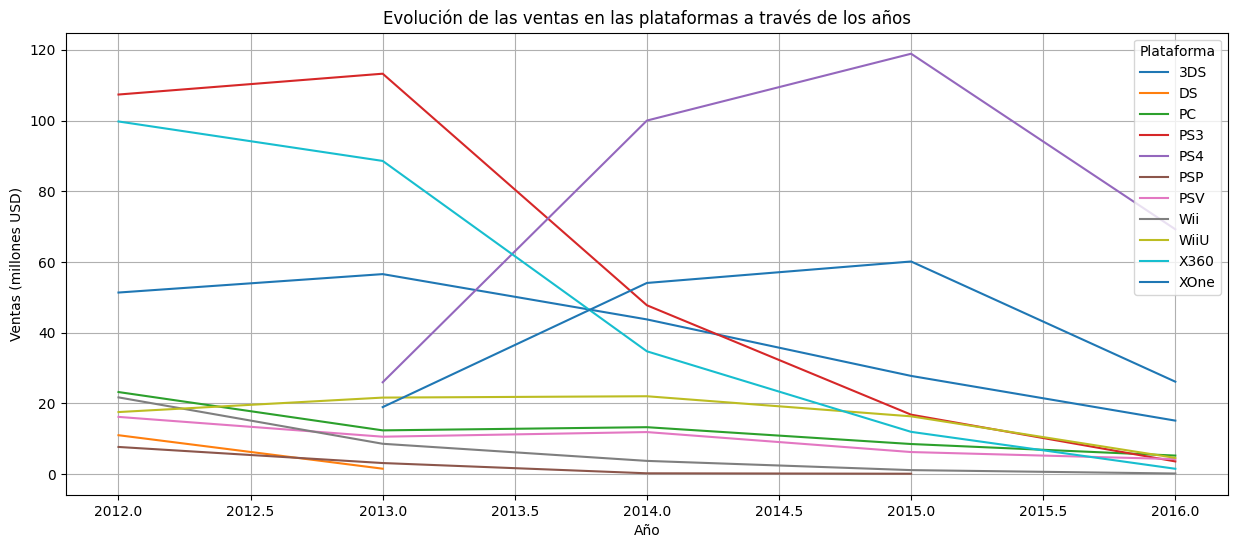

In [21]:
# Creamos un nuevo df con los juegos del 2012 en adelante
relevant_games = games[games['year_of_release'] >= 2012].reset_index()
# print(relevant_games)

# Pivot table de las ventas por plataforma cada año
pivot_relevant_games = relevant_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Gráfica
pivot_relevant_games.plot(figsize=(15,6),
                          title='Evolución de las ventas en las plataformas a través de los años',
                          xlabel='Año',
                          ylabel='Ventas (millones USD)',
                          grid=True)
plt.legend(title='Plataforma')
plt.show()

- Al año 2016 las plataformas que más vendieron fueron PS4 y XOne
- Plataformas como PS3 y X360 han disminuido considerablemente en sus ventas
- Otras plataformas, como PSV Y PC han bajado sus ventas pero no tan considerablemente, a pesar de esto, sus ventas nunca fueron tan grandes como la de otras plataformas ya mencionadas
- Plataformas como DS y PSP dejaron de vender

### Ventas globales de todos los juegos, desglosados por plataforma

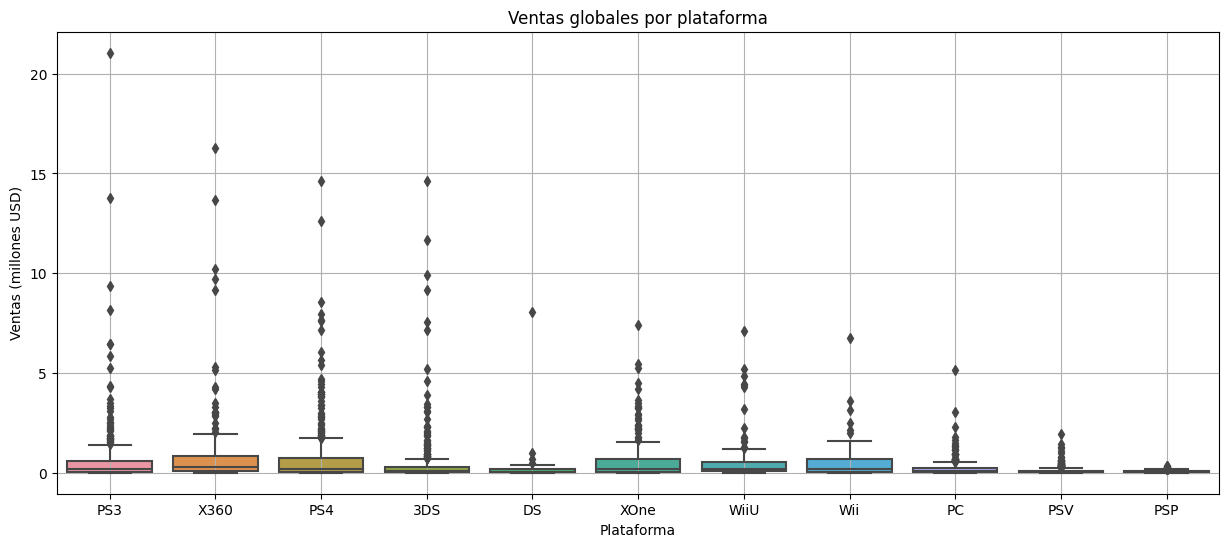

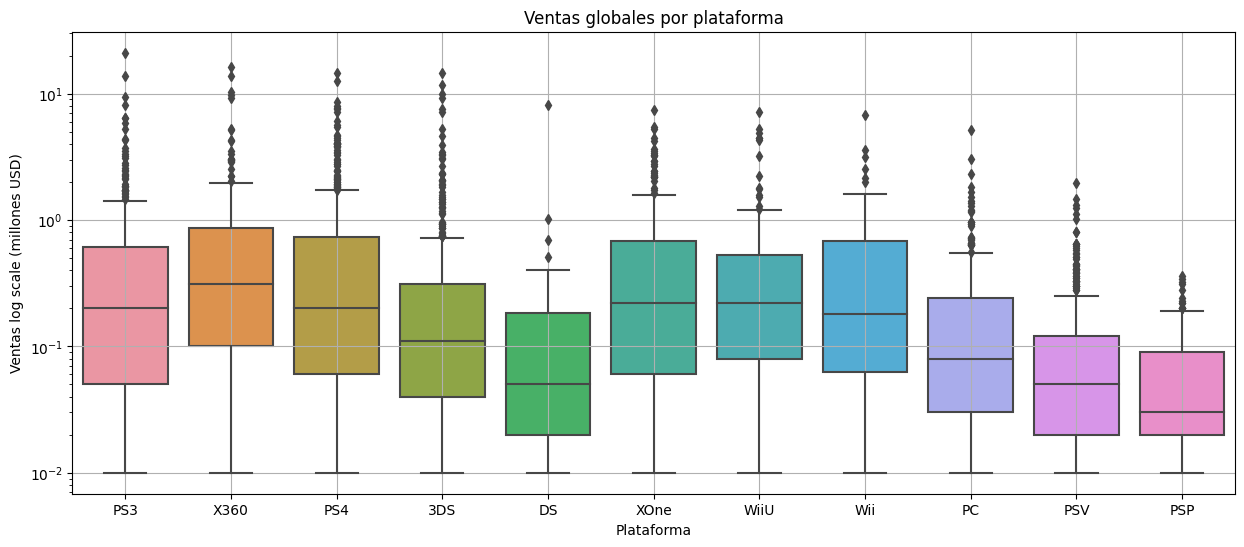

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


In [22]:
# Box plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=relevant_games, x='platform', y='total_sales')
plt.title('Ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones USD)')
plt.grid(True)
plt.show()

# Box plot con log scale
plt.figure(figsize=(15, 6))
sns.boxplot(data=relevant_games, x='platform', y='total_sales')
plt.yscale('log')
plt.title('Ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas log scale (millones USD)')
plt.grid(True)
plt.show()

# Datos descriptivos
relevant_games.groupby('platform')['total_sales'].describe()

- La mayoría de las plataformas tienen juegos que vendieron mucho, que son los valores atípicos.
- A pesar de esto, en general, la mayoría de los juegos tiene ventas más bajas.
- La mediana varía entre plataformas, sin embargo, si las comparamos desde la perspectiva de los juegos atípicos, son similares. Si vemos más de cerca, vemos las diferencias, aunque estas no son tan grandes a comparación de las diferencias con los valores atípicos.
- Algunas plataformas tienen una mayor dispersión en sus ventas que otros, por ejemplo, notamos que PSP y PSV tienen un IQR menor, pero con ventas más bajas.
- Las plataformas PS3, X360 y PS4 tienen los mayores valores atípicos, es decir, estas plataformas tuvieron juegos muy exitosos. Así mismo, estas plataformas tienen de las mayores medianas.

### Cómo afectan las reseñas de usuarios y profesionales en las ventas

- Se seleccionó la plataforma XOne

In [23]:
# Filtramos los datos para la plataforma
xone = relevant_games[relevant_games['platform'] == 'XOne']

#### Reseñas de profesionales vs ventas

Correlación de las ventas totales con las reseñas profesionales:
0.41699832800840175


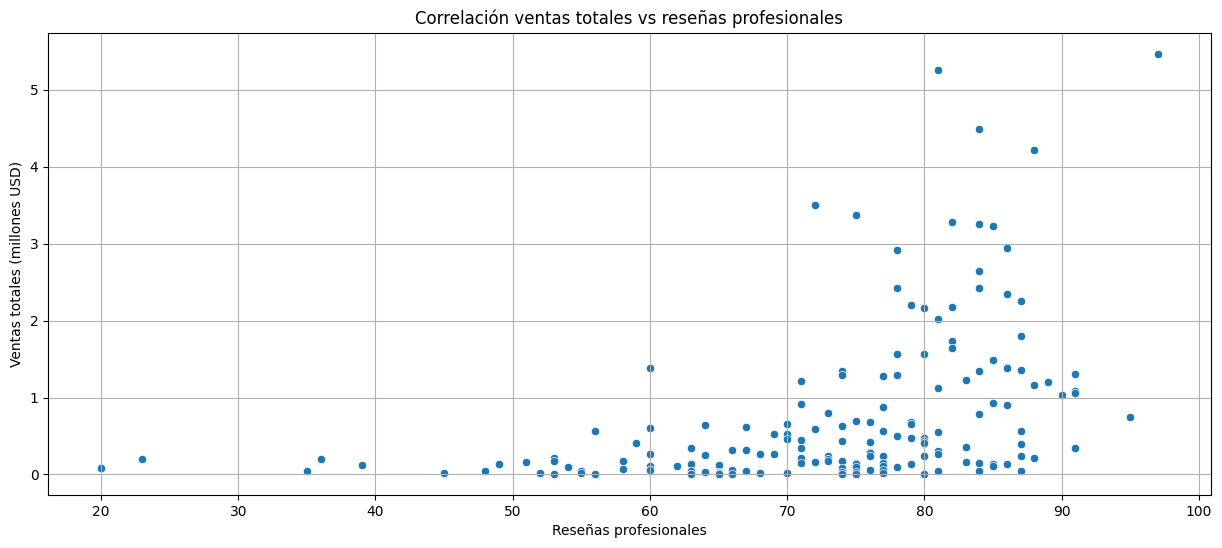

In [24]:
# Gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(data=xone, x='critic_score', y='total_sales')
plt.title('Correlación ventas totales vs reseñas profesionales')
plt.xlabel('Reseñas profesionales')
plt.ylabel('Ventas totales (millones USD)')
plt.grid(True)

# Correlación
print('Correlación de las ventas totales con las reseñas profesionales:')
print(xone['total_sales'].corr(xone['critic_score']))

- La correlación es moderada. No es lo suficientemente alta para decir que hay una gran dependencia, pero si una pequeña influencia.
- Mejores reseñas de los profesionales tienen a tener cierta influencia en mayores ventas.

#### Reseñas de usuarios vs ventas

Correlación de las ventas totales con las reseñas de usuarios:
-0.06892505328279412


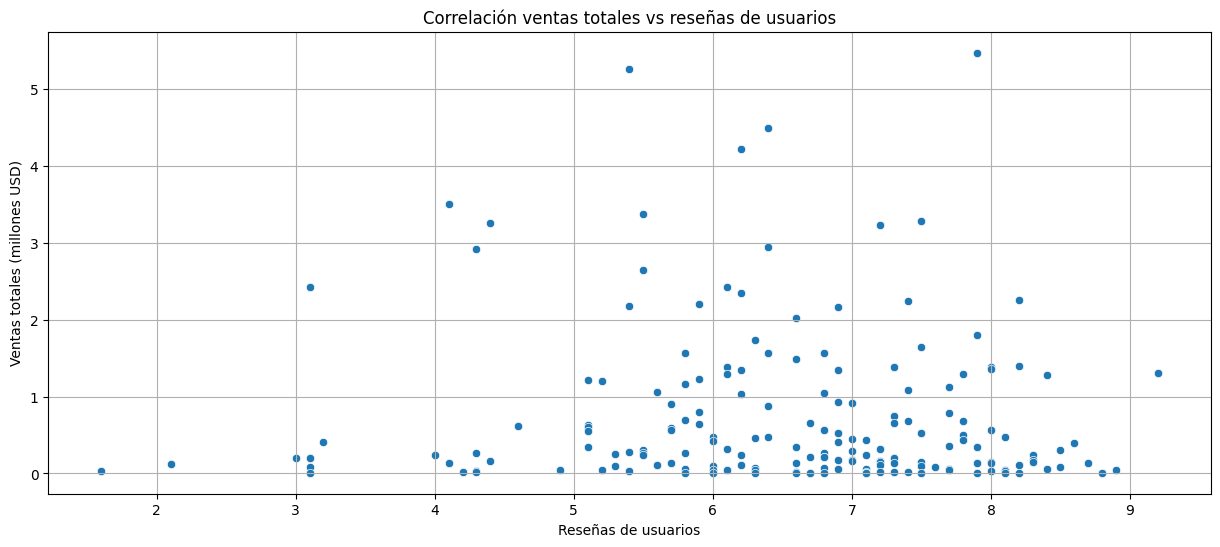

In [25]:
# Gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(data=xone, x='user_score', y='total_sales')
plt.title('Correlación ventas totales vs reseñas de usuarios')
plt.xlabel('Reseñas de usuarios')
plt.ylabel('Ventas totales (millones USD)')
plt.grid(True)

# Correlación
print('Correlación de las ventas totales con las reseñas de usuarios:')
print(xone['total_sales'].corr(xone['user_score']))

- La correlación es negativa y muy débil. No hay relación entre las variables.
- Las reseñas de los usuarios no están relacionadas con las ventas.

### Ventas de los mismos juegos en diferentes plataformas

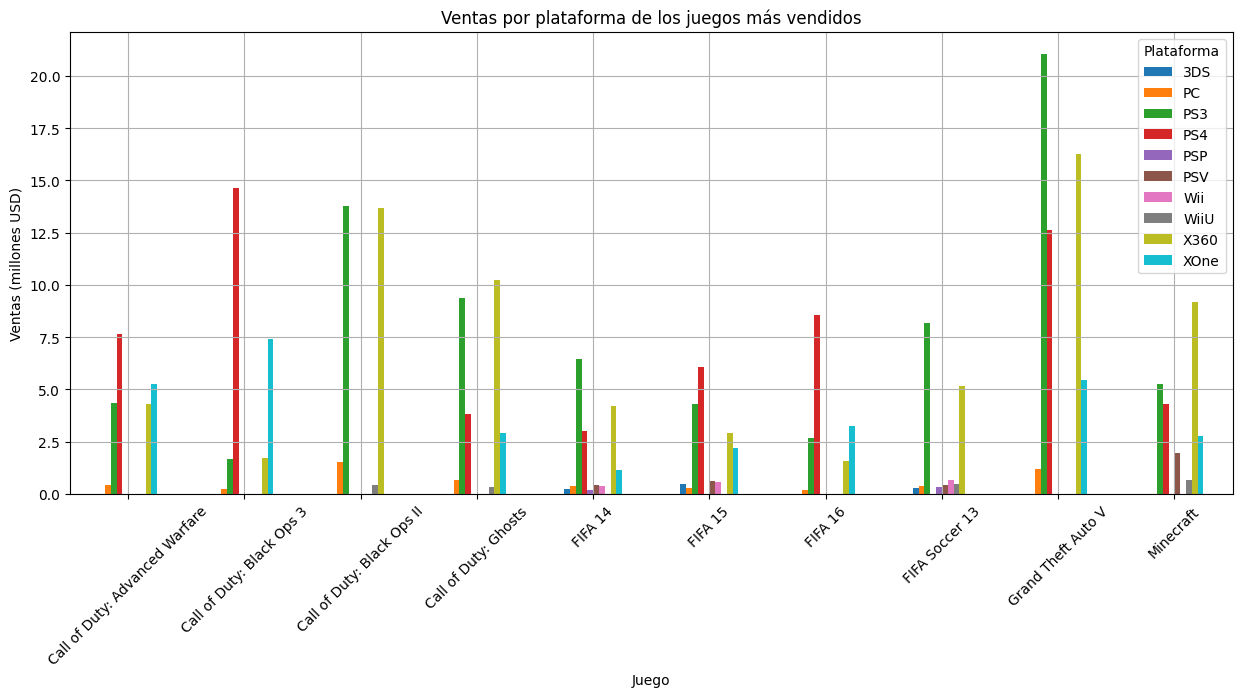

In [26]:
# Agrupar df por juego (se seleccionaron los 10 más vendidos)
top_games = relevant_games.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)
top_games_platform = relevant_games[relevant_games['name'].isin(top_games.index)]
# Pivot table con los juegos por plataforma y el total de ventas
pivot_top_games = top_games_platform.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

# Gráfico
pivot_top_games.plot(kind='bar',
                     figsize=(15,6),
                     title='Ventas por plataforma de los juegos más vendidos',
                     xlabel='Juego',
                     ylabel='Ventas (millones USD)',
                     rot='45',
                     grid=True)
plt.legend(title='Plataforma')
plt.show()

- Los juegos tienen más ventas en ciertas plataformas dependiendo de este. Es decir, tienen más éxito en dichas plataformas.
- Estas plataformas son, en su mayoría: PS3, X360 y PS4, que coincide con las plataformas que más venden.

### Juegos por género

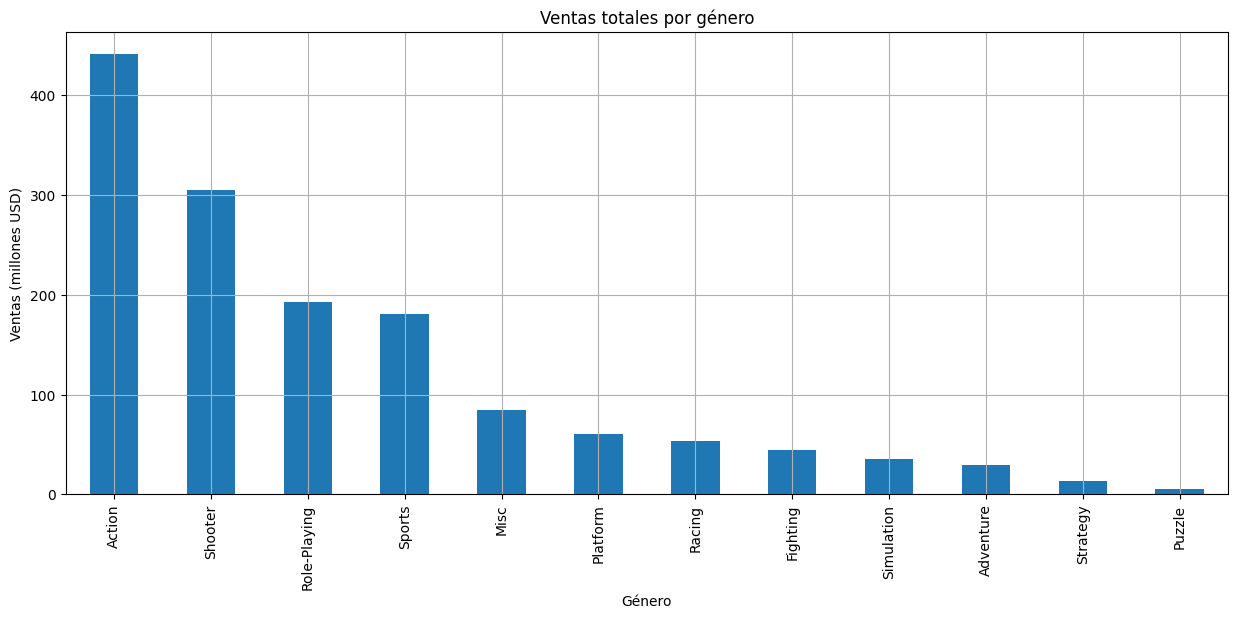

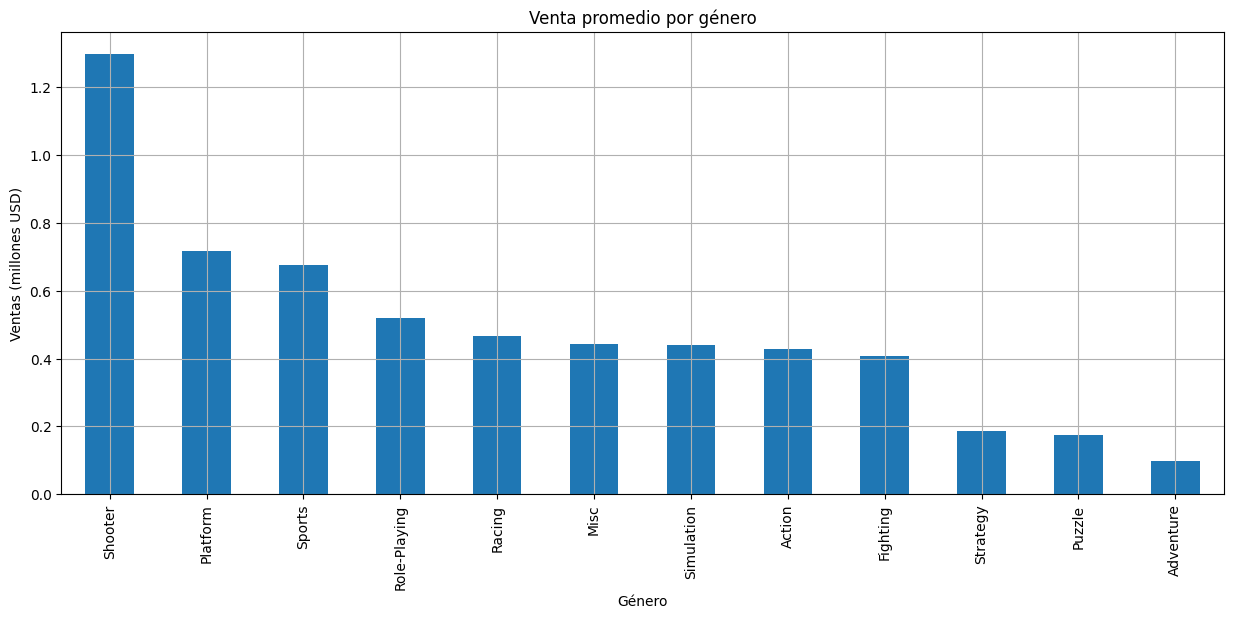

In [27]:
# Agrupar las ventas totales por género
top_genres = relevant_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
# Ventas promedio por género
mean_genres = relevant_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Gráfica de ventas totales
top_genres.plot(kind='bar', title='Ventas totales por género', xlabel='Género', ylabel='Ventas (millones USD)', figsize=(15,6), grid=True)
plt.show()
# Gráfica de ventas promedio
mean_genres.plot(kind='bar', title='Venta promedio por género', xlabel='Género', ylabel='Ventas (millones USD)', figsize=(15,6), grid=True)
plt.show()

- Podemos notar que los géneros con más ventas totales fueron: Action, Shooter y Role-Playing
- Los géneros con mayor venta promedio por juego fueron: Shooter, Platform y Sports
- Los que venden más en total no siempre son los que tienen mayor venta promedio por juego

## Perfil de usuario por región

- Para cada región (NA, UE, JP)

In [28]:
# Función para determinar las plataformas y géneros principales, y si ESRB afecta las ventas
def top_by_region (region_sales, region, df=relevant_games):
    top_platforms = df.groupby('platform')[region_sales].sum().sort_values(ascending=False).reset_index().head(5)
    top_genres = df.groupby('genre')[region_sales].sum().sort_values(ascending=False).reset_index().head(5)
    esrb = df.groupby('rating')[region_sales].mean().sort_values(ascending=False).reset_index()
    return top_platforms, top_genres, esrb

# Llamamos a la función por región
platforms_na, genres_na, esrb_na = top_by_region('na_sales', 'NA')
platforms_eu, genres_eu, esrb_eu = top_by_region('eu_sales', 'EU')
platforms_jp, genres_jp, esrb_jp = top_by_region('jp_sales', 'JP')

### Cinco plataformas principales

5 Plataformas principales por región
          na_sales  eu_sales  jp_sales
platform                              
X360        140.05     74.52       NaN
PS4         108.74    141.09     15.96
PS3         103.38    106.86     35.29
XOne         93.12     51.59       NaN
3DS          55.31     42.64     87.79
PSV            NaN       NaN     21.04
WiiU           NaN       NaN     13.01


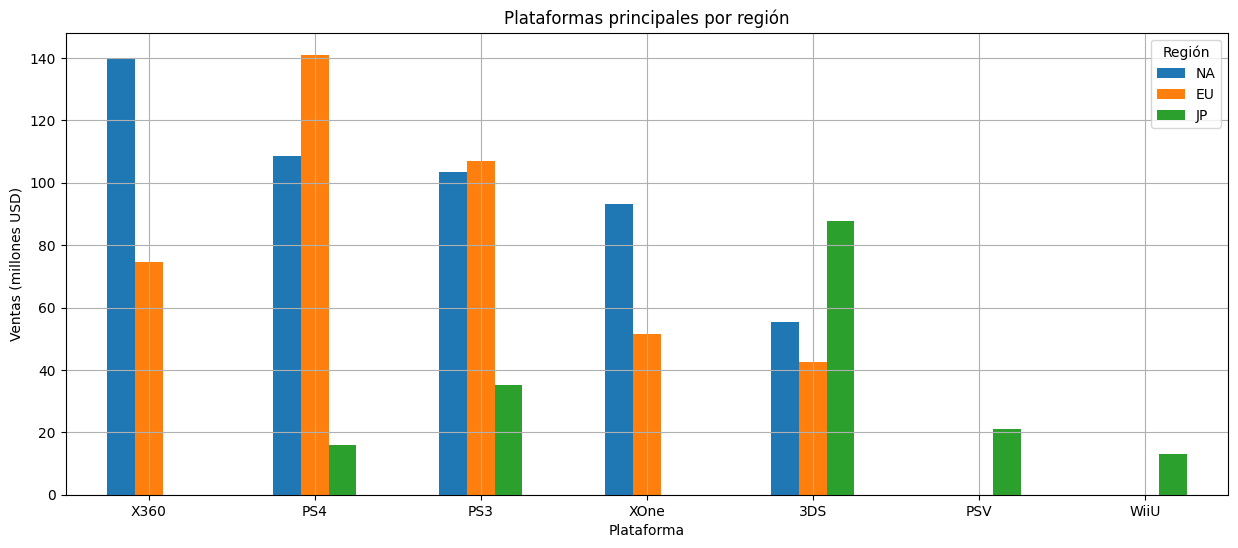

In [29]:
# Combinamos los df
platforms = platforms_na.merge(platforms_eu, on='platform', how='outer')
platforms = platforms.merge(platforms_jp, on='platform', how='outer')

#
print('5 Plataformas principales por región')
print(platforms.set_index('platform'))

# Gráfica
platforms.set_index('platform').plot(kind='bar', title='Plataformas principales por región', ylabel='Ventas (millones USD)', 
                                     xlabel='Plataforma', figsize=(15,6), grid=True, rot='0')
plt.legend(['NA', 'EU', 'JP'], title='Región')
plt.show()

- La región que más vende es NA y la que menos vende es JP
- Las 5 plataformas principales para NA y EU son las mismas, aunque no en el mismo orden
- Para JP algunas difiere y algunas son iguales
- Dependiendo de la plataforma es su nivel de ventas por región

### Cinco géneros principales

5 Géneros principales por región
              na_sales  eu_sales  jp_sales
genre                                     
Action          177.84    159.34     52.80
Shooter         144.77    113.47       NaN
Sports           81.53     69.09       NaN
Role-Playing     64.00     48.53     65.44
Misc             38.19       NaN     12.86
Racing             NaN     27.29       NaN
Simulation         NaN       NaN     10.41
Fighting           NaN       NaN      9.44


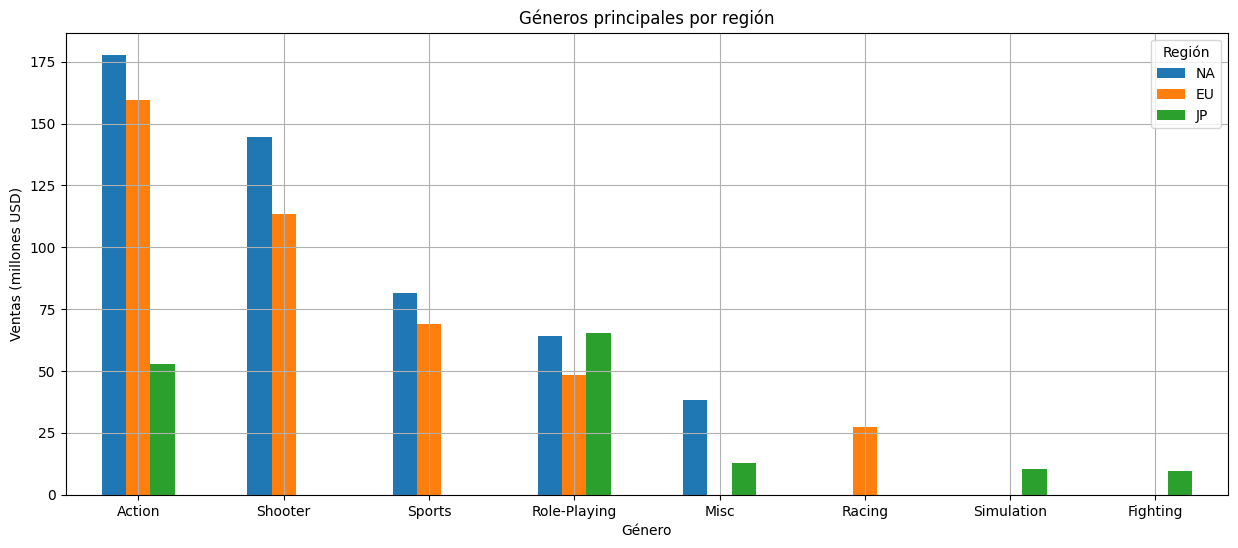

In [30]:
# Combinamos los df
genres = genres_na.merge(genres_eu, on='genre', how='outer')
genres = genres.merge(genres_jp, on='genre', how='outer')

#
print('5 Géneros principales por región')
print(genres.set_index('genre'))

# Gráfica
genres.set_index('genre').plot(kind='bar', title='Géneros principales por región', ylabel='Ventas (millones USD)', 
                                     xlabel='Género', figsize=(15,6), grid=True, rot='0')
plt.legend(['NA', 'EU', 'JP'], title='Región')
plt.show()

- Los primeros 4 géneros principales para NA y EU son los mismos
- Para JP difiere en algunas y otras son iguales
- Para las 3 regiones, los géneros Action y Role-Playing se encuentran en su top

### Clasificación ESRB

Clasificación ESRB vs Venta promedio
           na_sales  eu_sales  jp_sales  total_sales
rating                                              
M          0.465000  0.389478  0.042570     0.897048
E          0.289544  0.286152  0.071722     0.647418
E10+       0.247386  0.180948  0.026765     0.455098
T          0.160243  0.128544  0.063155     0.351942
No rating  0.081027  0.071765  0.085365     0.238157
AO              NaN       NaN       NaN          NaN
EC              NaN       NaN       NaN          NaN
K-A             NaN       NaN       NaN          NaN
RP              NaN       NaN       NaN          NaN


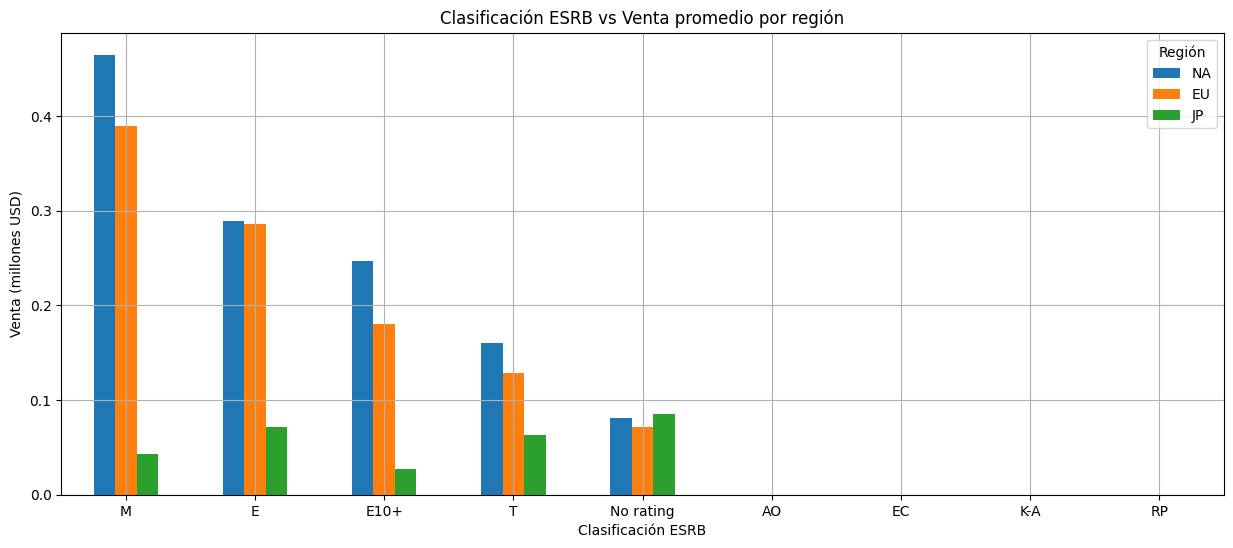

In [31]:
# Combinamos los df
esrb = esrb_na.merge(esrb_eu, on='rating', how='outer')
esrb = esrb.merge(esrb_jp, on='rating', how='outer') # .dropna()
esrb['total_sales'] = esrb['na_sales'] + esrb['eu_sales'] + esrb['jp_sales']
#
print('Clasificación ESRB vs Venta promedio')
print(esrb.set_index('rating'))

# Gráfica
esrb[['rating', 'na_sales', 'eu_sales', 'jp_sales']].set_index('rating').plot(kind='bar', title='Clasificación ESRB vs Venta promedio por región', ylabel='Venta (millones USD)', 
                                     xlabel='Clasificación ESRB', figsize=(15,6), grid=True, rot='0')
plt.legend(['NA', 'EU', 'JP', 'Total'], title='Región')
plt.show()

- La clasificación que más vende en promedio es "M"
- La clasificación que menos vende en promedio es "No rating", que no están clasificados
- Hay algunas clasificaciones que no venden
- En JP la venta promedio entre calificaciones no difiere tanto como en NA y EU

## Prueba de hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales
- H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes
- Hipótesis de igualdad de media de dos poblaciones

In [32]:
# Separar los user_score de cada plataforma
score_xone = relevant_games[(relevant_games['platform'] == 'XOne')]['user_score'].dropna()
score_pc = relevant_games[(relevant_games['platform'] == 'PC')]['user_score'].dropna()

# Prueba de hipótesis
alpha = 0.05
result_platforms = st.ttest_ind(score_xone, score_pc)
p_platforms = result_platforms.pvalue

print('Valor p:', p_platforms)

if p_platforms < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 0.5535080500643661
No podemos rechazar la hipótesis nula


No rechazamos la hipótesis nula. Es decir, no hay evidencia suficiente para concluir que hay diferencia entre las calificaciones de los usuarios de ambas plataformas.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

- H0: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son iguales
- H1: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes
- Hipótesis de igualdad de media de dos poblaciones

In [33]:
# Separar los user_score de cada género
score_action = relevant_games[(relevant_games['genre'] == 'Action')]['user_score'].dropna()
score_sport = relevant_games[(relevant_games['genre'] == 'Sports')]['user_score'].dropna()

# Prueba de hipótesis
alpha = 0.05
result_genres = st.ttest_ind(score_action, score_sport)
p_genres = result_genres.pvalue

print('Valor p:', p_genres)

if p_genres < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Valor p: 3.7163089460934874e-26
Rechazamos la hipótesis nula


Rechazamos la hipótesis nula. Es decir, hay evidencia suficiente para concluir que hay diferencia entre las calificaciones de los usuarios de ambos géneros.

## Conclusiones

***Limpieza de datos***
- Se identificaron y gestionaron valores ausentes.
- Dependiendo de la naturaleza se eliminaron las filas, se imputaron valores o se dejaron igual.
- Se identificaron y gestionaron tipos de datos incorrectos.
- Se creó la columna de "total_sales" sumando las ventas por región.

***Análisis de datos***
- Se identificaron los lanzamientos por años.
- Se identificaron las ventas por plataforma, siendo las más altas PS2, X360 y PS3.
- Se identificaron plataformas que antes eran populares y fueron decayendo en sus ventas: PS3, Wii y X360.
- Se calculó el tiempo de años activos por plataforma, siendo PC y DS las más activas.
- Se redujo el data frame a los últimos 5 años.
- Se identificó la evolución en las ventas por plataforma a través de los años:
  - Al último año (2016) las plataformas con más ventas fueron PS4 y XOne.
  - Las plataformas PS3 y X360 disminuyeron considerableente sus ventas
  - Plataformas como DS y PSP dejaron de vender
- Se identificaron las ventas globales por plataforma:
  - Las plataformas PS3, X360 y PS4 contaron con los mayores valores atípicos.
  - Las plataformas PSP y PSV tienen un IQR menor pero con ventas más bajas.
  - La mayoría de los juegos tiene ventas bajas en comparación con los valores atípicos.
- No se encontró correlación entre las ventas y las reseñas de los usuarios.
- Se encontró una moderada correlación (0.4) entre las ventas y las reseñas de los profesionales.
- Los géneros con más ventas totales fueron: Action, Shooter y Role-Playing.

***Perfil de usuario por región***
- La región que más vende es NA y la que menos vende es JP.
- Para las 3 regiones, los géneros Action y Role-Playing se encuentran en su top.
- La clasificación que más vende en promedio es "M".
- En JP la venta promedio entre calificaciones no difiere tanto como en NA y EU.

***Pruebas de hipótesis***
- No hay evidencia suficiente para concluir que hay diferencia entre las calificaciones de los usuarios de XOne y PC.
- Hay evidencia suficiente para concluir que hay diferencia entre las calificaciones de los usuarios de Acción y Deportes.